Importamos las librerias necesarias para calcular los datos estadisticos de utilidad

In [5]:
import pandas as pnd  # Importamos la libreria pandas
import numpy as np  # Importamos la libreria numpy

from collections import Counter  # Importamos la libreria Counter
from math import *  # Importamos la libreria math
import matplotlib.pyplot as plt   # Importamos la libreria matplotlib.pyplot

In [6]:
class MetodosEstadisticos:    # Creamos la clase MetodosEstadisticos

    def __init__(self,numeros):    # Creamos el init de la clase MetodosEstadisticos
        self.numeros = numeros


    def calculoMediaAritmetica(self):
        n = self.numeros.count() #contamos la cantidad de numeros a sumar para despues dividir entre este numero
        media = 0 #variable que almacena el valor de la suma de los numeros
        for valor in self.numeros:     
            media = media + valor
        return media/n

    def calculoModa(self):     # Creamos la función para calcular la moda
        moda = Counter(self.numeros)
        return moda
    def calculoMediana2(self):   # Creamos la función para calcular la mediana2
        mediana = str(self.numeros.median())
        return mediana
    def calculoMediana(self):    # Creamos la función para calcular la mediana
        mediana = 0
        lista_numeros = self.numeros.sort_values()
        n = self.numeros.count()
        par = False
        if (n % 2 == 0):       # Comprobamos si la cantidad de observaciones es par o impar
            print("La cantidad de observaciones es par.")
            par = True       # Si es par, la variable par se vuelve True

        if par:
            rango = (n / 2)
            print("RANGO = "+str(rango))
            rangoPython = rango-1
            valor1 = lista_numeros[rangoPython]
            valor2 = lista_numeros[rangoPython+1]
            mediana = valor1 +((valor2-valor1)/2)
        else:
            rango = ((n + 1) / 2)
            rangoPython = rango - 1
            mediana = lista_numeros[rangoPython]

        return [mediana, rango]

    def calculoVarianzaDesviacionTipica(self):
        n = self.numeros.count()
        mediaAritmetica = self.numeros.mean()
        varianza = 0
        c3 = 0
        for valorObservacion in self.numeros:
            x = valorObservacion
            moy = mediaAritmetica
            c1 = valorObservacion - mediaAritmetica
            c2 = c1 * c1
            c3 = c3 + c2

        varianza = c3 / (n - 1)

        desviacionTipica = sqrt(varianza)

        return ([varianza, desviacionTipica])
    
    
    def calculoDelosCuartiles(self,mediana,rangoMediana):
        n = self.numeros.count()
        sort_caracteristica = self.numeros.sort_values()
        sort_caracteristica = sort_caracteristica.reset_index(drop=True)
        q1 = 0
        q2 = mediana
        q3 = 0

        #Cálculo Q1
        restoDivision = rangoMediana%2
        if (restoDivision != 0):
            q1 = sort_caracteristica[((rangoMediana/2)+1)-1]
        else:
            valorMin = sort_caracteristica[((rangoMediana/2)-1)]
            valorMax = sort_caracteristica[(rangoMediana/2)]
            q1 = (valorMin + ((valorMax - valorMin) / 2) + valorMax) / 2

        # Cálculo Q3
        nbdatos = len(sort_caracteristica)+1
        nbDatosDesdeMediana = nbdatos - rangoMediana
        restoDivision = nbDatosDesdeMediana % 2
        if (restoDivision != 0):
            q3 = sort_caracteristica[(rangoMediana+ceil(nbDatosDesdeMediana/2))-1]
        else:
            valorMinQ3 = sort_caracteristica[(rangoMediana+(nbDatosDesdeMediana/2))-1]
            valorMaxQ3 = sort_caracteristica[(rangoMediana+(nbDatosDesdeMediana/2))]
            q3 = (valorMin + ((valorMax - valorMin) / 2) + valorMax) / 2


        return ([q1, q2, q3])


    def criterioDeTukey(self, primerCuartil, tercerCuartil):     # Creamos la función para calcular el criterio de Tukey

        valoresAberrantesInferiores = []
        valoresAberrantesSuperiores = []
        caracteristica = self.numeros.sort_values()
        intercuartil = tercerCuartil - primerCuartil
        print("Inter-cuartil = "+str(intercuartil))
        limiteInferior = primerCuartil - (1.5 * intercuartil)
        limiteSuperior = tercerCuartil + (1.5 * intercuartil)

        for valorObservacion in caracteristica:
            if valorObservacion < limiteInferior:
                valoresAberrantesInferiores.append(valorObservacion)

            if valorObservacion > limiteSuperior:
                valoresAberrantesSuperiores.append(valorObservacion)

        valoresAberrantes = valoresAberrantesInferiores + valoresAberrantesSuperiores

        return (valoresAberrantes)
    def visualizacion(self,media,mediana,cuartil_1,cuartil_2,cuartil_3):    # Creamos la función para visualizar los datos

        plt.subplot(2, 2, 1)     # Creamos el histograma y la media
        plt.hist(self.numeros)   # Creamos el histograma
        plt.title("Histograma y media")    # Ponemos el título al histograma
        plt.axvline(media, color='red', linestyle='dashed', linewidth=1,label = str(media))  # Creamos la línea de la media
        plt.legend(loc='upper right')

        plt.subplot(2, 2, 2)
        plt.hist(self.numeros)
        plt.title("Histograma y mediana")
        plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1,label = str(mediana))
        plt.legend(loc='upper right')

        plt.subplot(2, 2, 3)
        plt.hist(self.numeros)
        plt.title("Histograma y cuartiles")
        plt.axvline(cuartil_1, color='orange', linestyle='dashed', linewidth=1,label = "Q1: "+str(cuartil_1))
        plt.axvline(cuartil_2, color='orange', linestyle='dashed', linewidth=1,label = "Q2: "+str(cuartil_2))
        plt.axvline(cuartil_3, color='orange', linestyle='dashed', linewidth=1,label = "Q3: "+str(cuartil_3))
        plt.legend(loc='upper right')

        plt.subplot(2, 2, 4)
        plt.boxplot(self.numeros)
        plt.title("Diagrama de caja y bigotes")
        plt.show()


    def analisisCaracteristica(self):

        print("-----------------------------------------")
        print("      MEDIDA DE TENDENCIA CENTRAL        ")
        print("-----------------------------------------\n")

        print("-- CANTIDAD DE OBSERVACIONES --")
        # -Cantidad de observaciones
        n = self.numeros.count()
        print("Cantidad de observaciones = " + str(n))

        print ("\n-- MIN --")
        valoresOrdenados = self.numeros.sort_values()
        valoresOrdenados = valoresOrdenados.reset_index(drop=True)
        print("Valor mínimo: "+str(valoresOrdenados[0]))

        print ("\n-- MAX --")
        valoresOrdenados = self.numeros.sort_values()
        valoresOrdenados = valoresOrdenados.reset_index(drop=True)
        print("Valor máximo: " + str(valoresOrdenados[len(valoresOrdenados)-1]))

        # -Media artimética:
        print("\n-- MEDIA --")
        media = self.calculoMediaAritmetica()
        print("Media aritmética calculada = " + str(media))
        print("> Observaciones: Si todas las observaciones tuvieran el mismo valor (reparto equitativo), este sería " + str(media))

        # -Media aritmética:
        print("\n-- MEDIANA --")
        mediana = self.calculoMediana()
        print("Mediana calculada =", mediana)
        print("> Observaciones: El valor que se encuentra en el punto medio de las observaciones es:" + str(mediana[0]))
        print("El reparto es: " + str(mediana[1]) + " valores en cada lado de la mediana")

        # -Moda
        print("\n-- MODA --")
        moda = self.calculoModa()
        print(moda)
        print("> Observacions: La moda permite determinar los valores observados con más frecuencia")


        print("\n\n-----------------------------------------")
        print("      MEDIDA DE DISPERSION        ")
        print("-----------------------------------------\n")
        print("-- RANGO --")
        print ("Rango de la serie = "+str(valoresOrdenados[len(valoresOrdenados)-1]-valoresOrdenados[0]))
        varianzaDesviacionTipica = self.calculoVarianzaDesviacionTipica()

        print("\n-- VARIANZA --")
        print("Varianza calculada = " + str(varianzaDesviacionTipica[0]))

        print("\n-- DESVIACION TIPICA --")
        print("Desviación típica calculada = " + str(varianzaDesviacionTipica[1]))
        desviacionTipica = varianzaDesviacionTipica[1]
        print("68 % de los valores de las observaciones se sitúan entre " + str(media - desviacionTipica) + " y " + str(
            media + desviacionTipica))
        print("95 % de los valores de las observaciones se sitúan entre " + str(media - (desviacionTipica * 2)) + " y " + str(
            media + (desviacionTipica * 2)))
        print("99 % de los valores de las observaciones se sitúan entre " + str(media - (desviacionTipica * 3)) + " y " + str(
            media + (desviacionTipica * 3)))

        print("\n\n-----------------------------------------")
        print("      CUARTILES        ")
        print("-----------------------------------------\n")
        cuartiles = self.calculoDelosCuartiles(mediana[0],mediana[1])
        print("25 % de las observaciones tienen un valor inferior a " + str(cuartiles[0]))
        print("50 % de las observaciones tienen un valor inferior a " + str(cuartiles[1]))
        print("75 % de las observaciones tienen un valor inferior a " + str(cuartiles[2]))


        print("\n\n-----------------------------------------")
        print("      DETECCION VALORES ABERRANTES        ")
        print("-----------------------------------------\n")
        print("> Criterios de Tukey")
        valoresAberrantes = self.criterioDeTukey(cuartiles[0], cuartiles[2])
        print("Cantidad de valores aberrantes: " + str(len(valoresAberrantes)))
        print("Valores:" + str(valoresAberrantes))


        print("\n\n-----------------------------------------")
        print("      VISUALIZACION        ")
        print("-----------------------------------------\n")
        print("Generación de las gráficas...")
        self.visualizacion(media,mediana[0],cuartiles[0],cuartiles[1],cuartiles[2])

Creamos el Data Frame con los datos que analizaremos

In [7]:
observaciones = pnd.DataFrame({'NOTAS':np.array([3,19,10,15,14,12,9,8,11,12,11,12,13,11,14,16])})

-----------------------------------------
      MEDIDA DE TENDENCIA CENTRAL        
-----------------------------------------

-- CANTIDAD DE OBSERVACIONES --
Cantidad de observaciones = 16

-- MIN --
Valor mínimo: 3

-- MAX --
Valor máximo: 19

-- MEDIA --
Media aritmética calculada = 11.875
> Observaciones: Si todas las observaciones tuvieran el mismo valor (reparto equitativo), este sería 11.875

-- MEDIANA --
La cantidad de observaciones es par.
RANGO = 8.0
Mediana calculada = [9.5, 8.0]
> Observaciones: El valor que se encuentra en el punto medio de las observaciones es:9.5
El reparto es: 8.0 valores en cada lado de la mediana

-- MODA --
Counter({12: 3, 11: 3, 14: 2, 3: 1, 19: 1, 10: 1, 15: 1, 9: 1, 8: 1, 13: 1, 16: 1})
> Observacions: La moda permite determinar los valores observados con más frecuencia


-----------------------------------------
      MEDIDA DE DISPERSION        
-----------------------------------------

-- RANGO --
Rango de la serie = 16

-- VARIANZA --
Varian

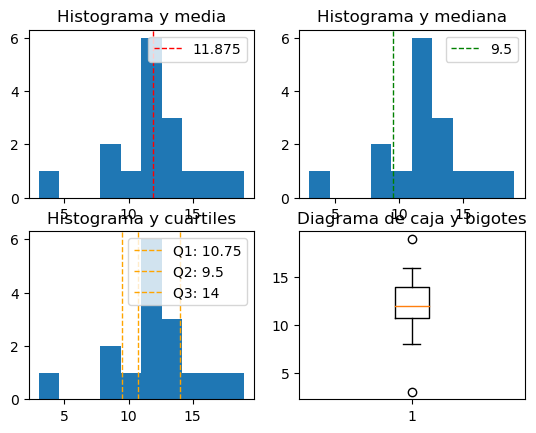

In [8]:
stats = MetodosEstadisticos(observaciones['NOTAS'])
stats.analisisCaracteristica()